# ATC Clustering

### Import Library

In [14]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns
#
from sklearn.cluster import KMeans
#
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [3]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [4]:
data = dataset.copy()

In [6]:
data = data[(data.index > '2020-11-01 00:00:00') & (data.index < '2024-10-01 00:00:00')].copy()

In [7]:
data['return'] = data['Close'] - data['Close'].shift(1)

In [21]:
data.tail(10)

,Open,High,Low,Close,Volume,return
Date,,,,,,
2024-09-30 13:50:00,1354.7,1355.2,1354.3,1354.8,2234,0.0
2024-09-30 13:55:00,1354.8,1354.8,1352.9,1353.0,4190,-1.8
2024-09-30 14:00:00,1353.2,1354.5,1352.9,1354.2,2493,1.2
2024-09-30 14:05:00,1354.2,1354.4,1352.3,1354.3,2625,0.1
2024-09-30 14:10:00,1354.3,1355.0,1353.1,1353.1,3770,-1.2
2024-09-30 14:15:00,1353.1,1353.9,1351.5,1353.1,6265,0.0
2024-09-30 14:20:00,1353.0,1354.7,1352.6,1354.6,4426,1.5
2024-09-30 14:25:00,1354.6,1356.3,1354.1,1355.9,7920,1.3
2024-09-30 14:30:00,1355.7,1355.8,1355.7,1355.8,38,-0.1


## 7. RSI slope & price slope between 2:00PM & ATC

In [89]:
df7 = data.copy()
df7['return'] = df7['return'].shift(-2)
df7['RSI'] = ta.rsi(df7["Close"], length=14)
df7['price_slope'] = df7['Close'] - df7['Close'].shift(5)
df7['RSI_slope'] = df7['RSI'] - df7['RSI'].shift(5)
useful_data = df7[(df7.index.hour == 14) & (df7.index.minute == 25)]
useful_data.dropna(inplace=True)

In [90]:
feature_cols = ["price_slope", "RSI_slope"]
cluster = KMeans(n_clusters=20, n_init=2).fit(useful_data[feature_cols])
useful_data = useful_data.assign(cluster=cluster.labels_)

<Axes: xlabel='cluster'>

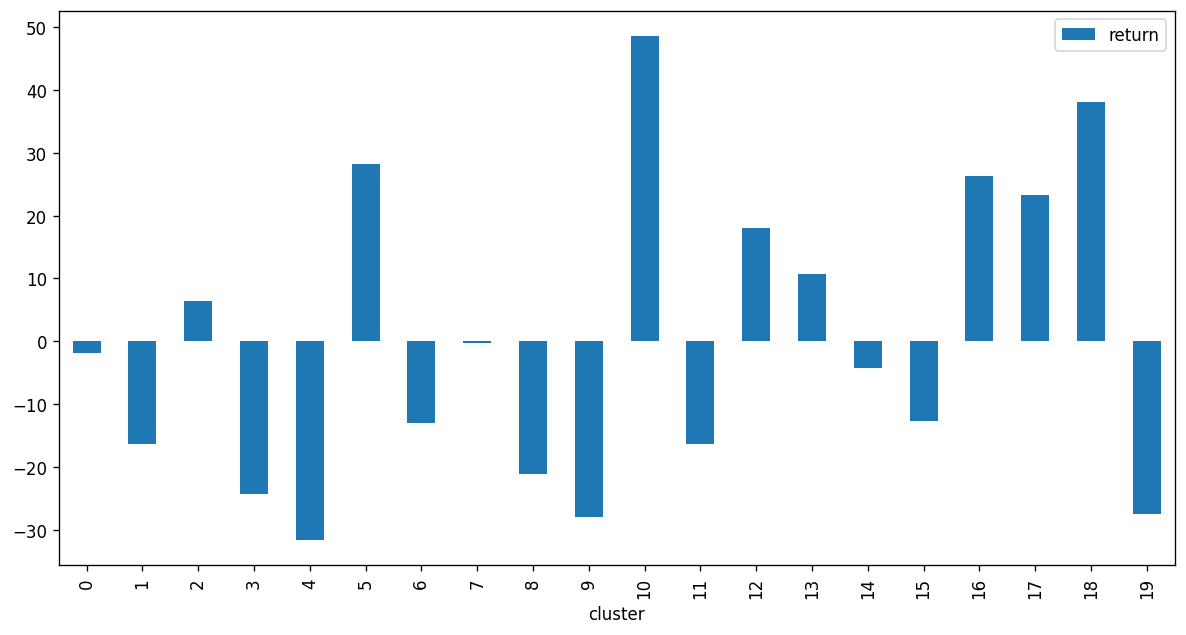

In [91]:
group_by_cluster = useful_data.groupby(['cluster'])[['return']].sum()
group_by_cluster.plot.bar()

<Axes: xlabel='cluster'>

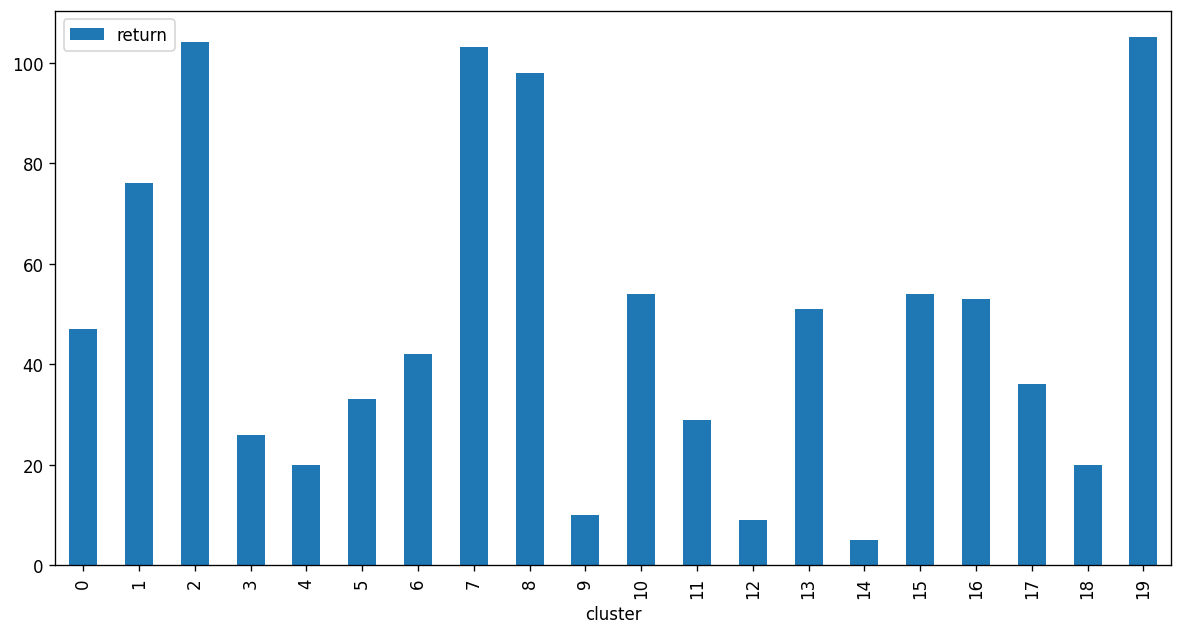

In [92]:
group_by_clusterc = useful_data.groupby(['cluster'])[['return']].count()
group_by_clusterc.plot.bar()

## 6. Close-Open from 2:00PM & ATC relationship

In [85]:
df6 = data.copy()
df6['return'] = df6['return'].shift(-2)
#
df6['diff_oc'] = df6['Close'] - df6['Open']
df6['diff_oc_s1'] = df6['diff_oc'].shift(1)
df6['diff_oc_s2'] = df6['diff_oc'].shift(2)
df6['diff_oc_s3'] = df6['diff_oc'].shift(3)
df6['diff_oc_s4'] = df6['diff_oc'].shift(4)
df6['diff_oc_s5'] = df6['diff_oc'].shift(5)
useful_data = df6[(df6.index.hour == 14) & (df6.index.minute == 25)]
useful_data.dropna(inplace=True)

In [86]:
feature_cols = ["diff_oc", "diff_oc_s1", "diff_oc_s2", "diff_oc_s3", "diff_oc_s4", "diff_oc_s5"]
cluster = KMeans(n_clusters=20, n_init=2).fit(useful_data[feature_cols])
useful_data = useful_data.assign(cluster=cluster.labels_)

<Axes: xlabel='cluster'>

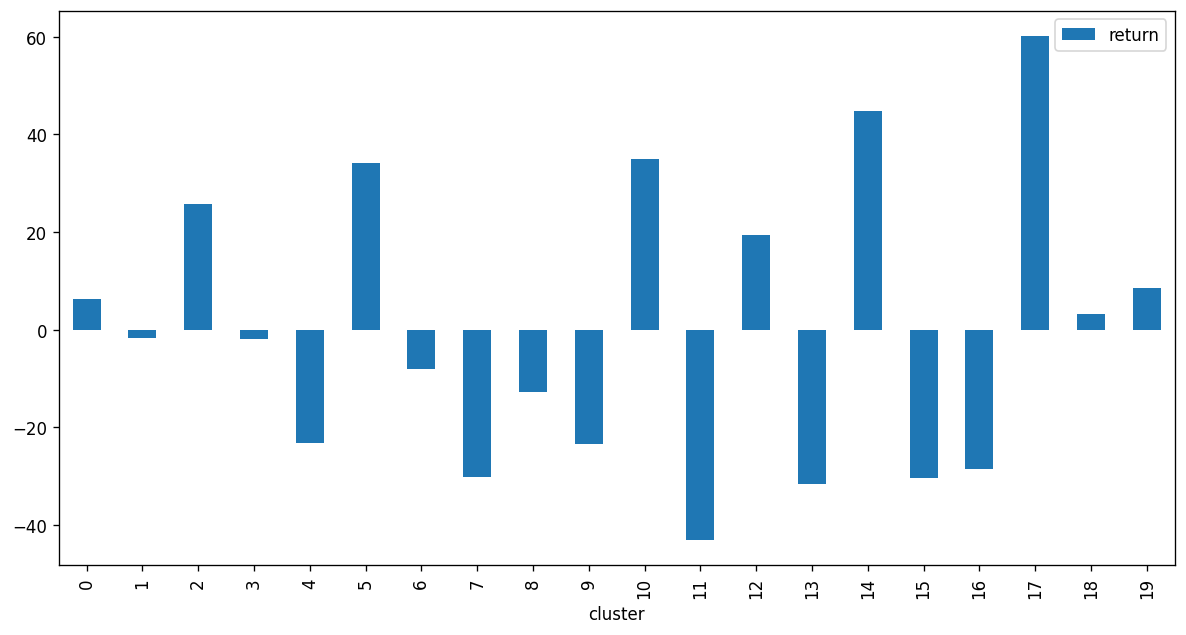

In [87]:
group_by_cluster = useful_data.groupby(['cluster'])[['return']].sum()
group_by_cluster.plot.bar()

<Axes: xlabel='cluster'>

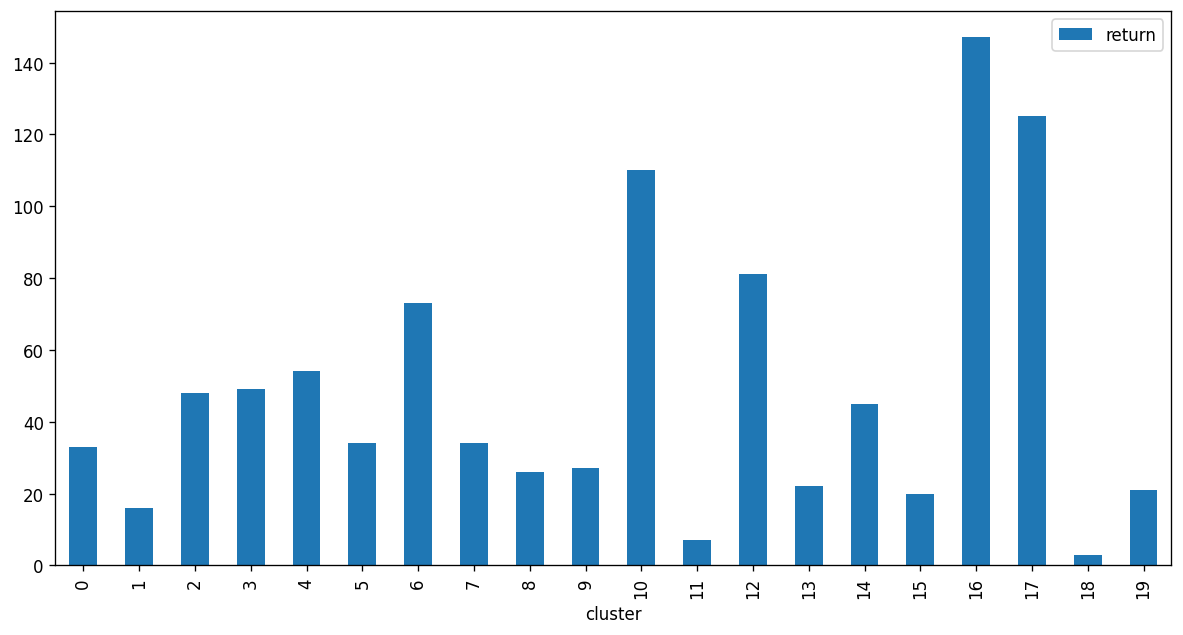

In [88]:
group_by_clusterc = useful_data.groupby(['cluster'])[['return']].count()
group_by_clusterc.plot.bar()

## 5. IBS from 2PM & ATC relationship

In [81]:
df5 = data.copy()
df5['return'] = df5['return'].shift(-2)
#
df5['ibs'] = (df5['Close'] - df5['Low']) / (df5['High'] - df5['Low'])
df5['ibs_s1'] = df5['ibs'].shift(1)
df5['ibs_s2'] = df5['ibs'].shift(2)
df5['ibs_s3'] = df5['ibs'].shift(3)
df5['ibs_s4'] = df5['ibs'].shift(4)
df5['ibs_s5'] = df5['ibs'].shift(5)
useful_data = df5[(df5.index.hour == 14) & (df5.index.minute == 25)]
useful_data.dropna(inplace=True)

In [82]:
feature_cols = ["ibs", "ibs_s1", "ibs_s2", "ibs_s3", "ibs_s4", "ibs_s5"]
cluster = KMeans(n_clusters=20, n_init=2).fit(useful_data[feature_cols])
useful_data = useful_data.assign(cluster=cluster.labels_)

<Axes: xlabel='cluster'>

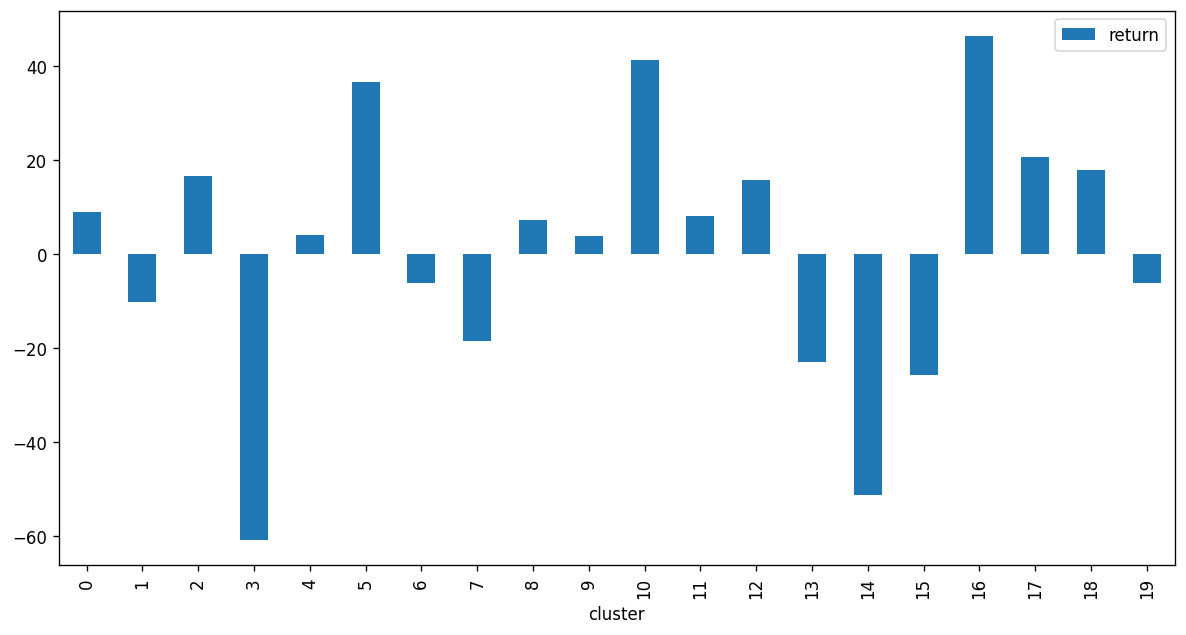

In [83]:
group_by_cluster = useful_data.groupby(['cluster'])[['return']].sum()
group_by_cluster.plot.bar()

<Axes: xlabel='cluster'>

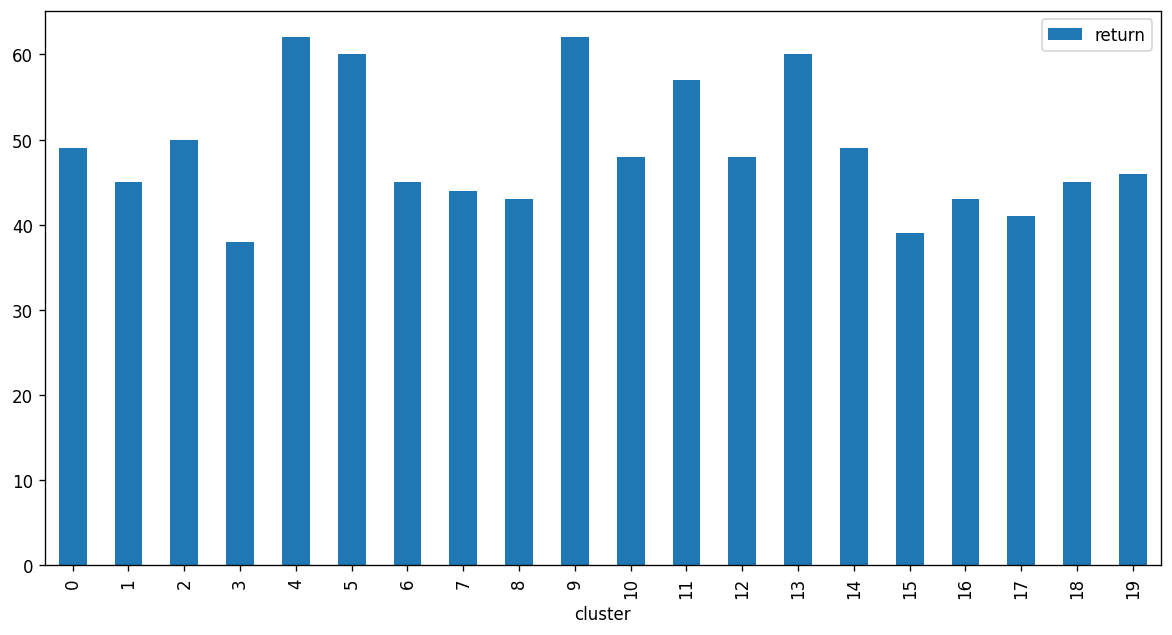

In [84]:
group_by_clusterc = useful_data.groupby(['cluster'])[['return']].count()
group_by_clusterc.plot.bar()

## 4. today High-Low & price from 2:00 PM & ATC relationship

In [73]:
df4= data.copy()
df4['return'] = df4['return'].shift(-2)
df4['today_High'] = df4['High'].rolling(48).max()
df4['today_Low'] = df4['Low'].rolling(48).min()
df4['frist_Close'] = df4['Close'].shift(48)
df4['_2pm_Close'] = df4['Close'].shift(5)
df4['from_2pm_High'] = df4['High'].rolling(5).max()
df4['from_2pm_Low'] = df4['Low'].rolling(5).min()
useful_data = df4[(df4.index.hour == 14) & (df4.index.minute == 25)]

In [74]:
useful_data['rate_x'] = (useful_data.Close - useful_data.frist_Close) / (useful_data.today_High - useful_data.today_Low)
useful_data['rate_y'] = (useful_data.Close - useful_data._2pm_Close) / (useful_data.from_2pm_High - useful_data.from_2pm_Low)
useful_data.dropna(inplace=True)

<Axes: xlabel='cluster'>

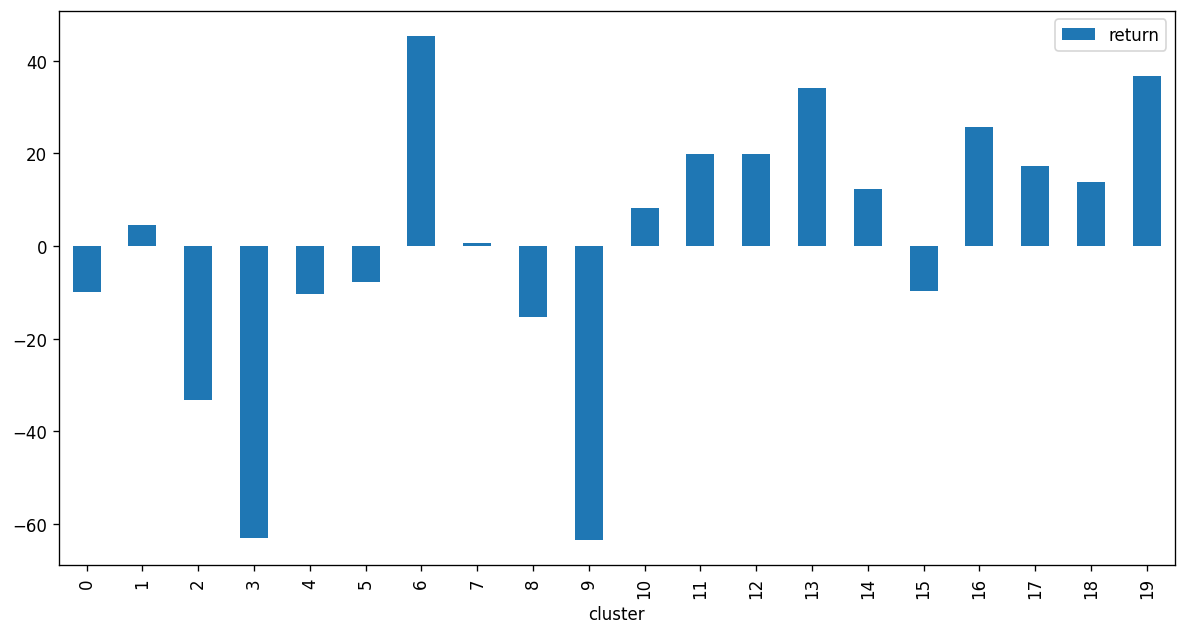

In [75]:
feature_cols = ["rate_x", "rate_y"]
cluster = KMeans(n_clusters=20, n_init=2).fit(useful_data[feature_cols])
useful_data = useful_data.assign(cluster=cluster.labels_)
group_by_cluster = useful_data.groupby(['cluster'])[['return']].sum()
group_by_cluster.plot.bar()

<Axes: xlabel='cluster'>

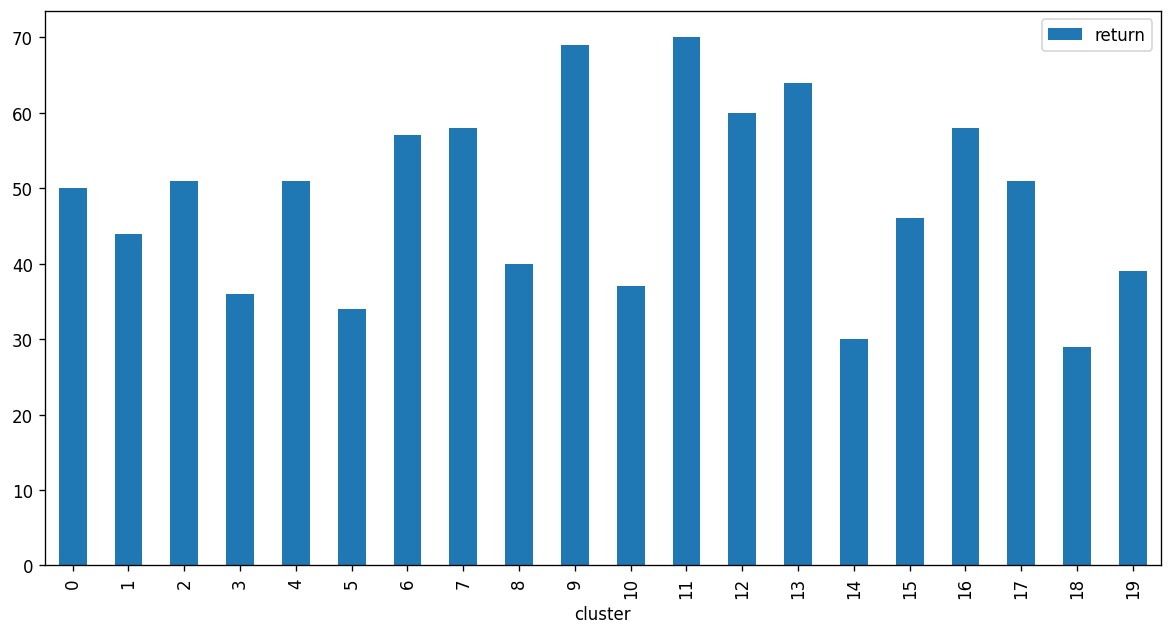

In [76]:
group_by_clusterc = useful_data.groupby(['cluster'])[['return']].count()
group_by_clusterc.plot.bar()

## 3. Yesterday Close & today High - Low & ATC relationship

In [60]:
df3= data.copy()
df3['return'] = df3['return'].shift(-2)
df3['yesterday_Close'] = df3['Close'].shift(49)
df3['today_High'] = df3['High'].rolling(48).max()
df3['today_Low'] = df3['Low'].rolling(48).min()
df3['frist_Close'] = df3['Close'].shift(48)
# df3['time'] = df3.index
# df3['test_time'] = df3['time'].shift(45)
useful_data = df3[(df3.index.hour == 14) & (df3.index.minute == 25)]

In [61]:
useful_data['mom_y'] = 100 * (useful_data.Close - useful_data.yesterday_Close) / useful_data.yesterday_Close
useful_data['body_rate'] = (useful_data.Close - useful_data.frist_Close) / (useful_data.today_High - useful_data.today_Low)

In [62]:
useful_data.dropna(inplace=True)

In [69]:
feature_cols = ["mom_y", "body_rate"]
cluster = KMeans(n_clusters=30, n_init=2).fit(useful_data[feature_cols])
useful_data = useful_data.assign(cluster=cluster.labels_)

<Axes: xlabel='cluster'>

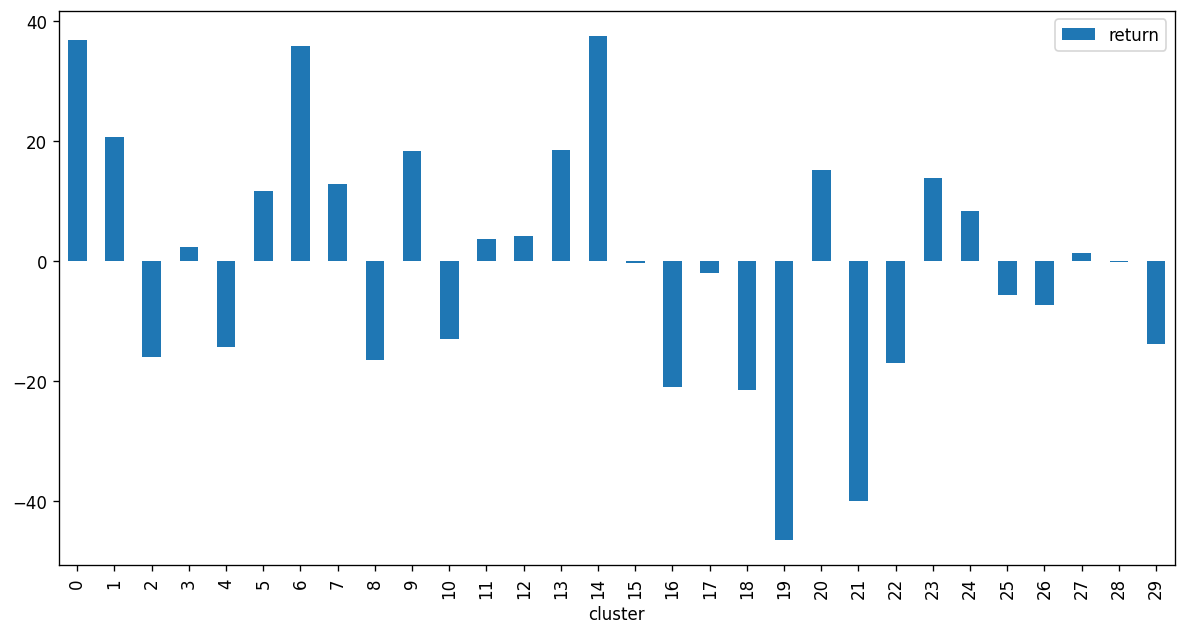

In [70]:
group_by_cluster = useful_data.groupby(['cluster'])[['return']].sum()
group_by_cluster.plot.bar()

<Axes: xlabel='cluster'>

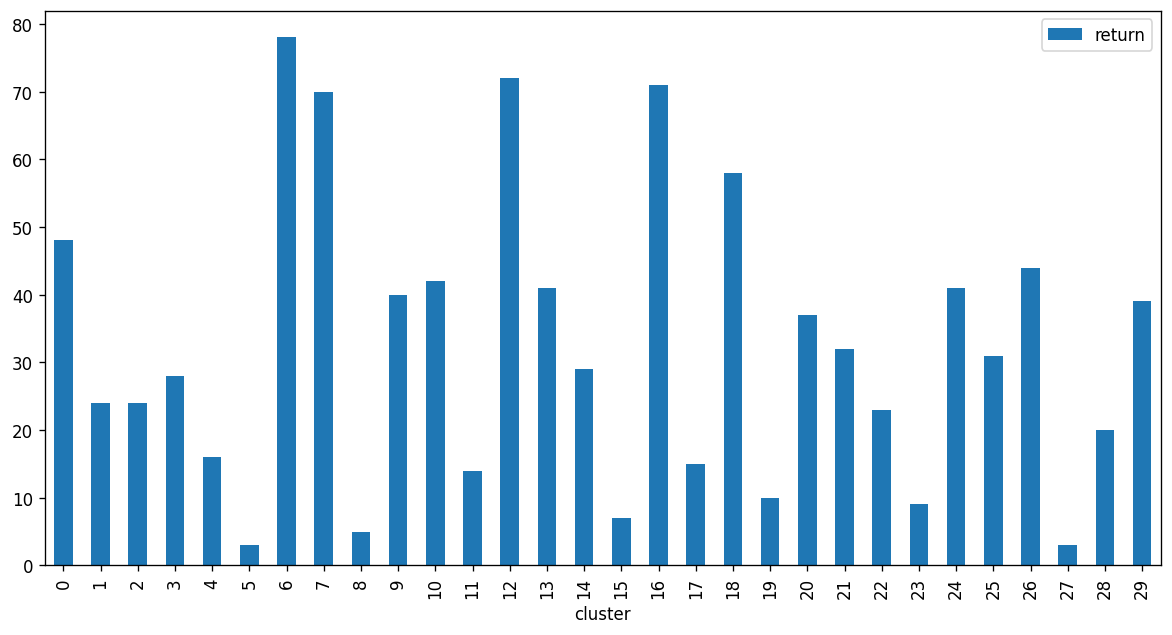

In [71]:
group_by_clusterc = useful_data.groupby(['cluster'])[['return']].count()
group_by_clusterc.plot.bar()

## 2. Custom indicator from 2:00PM & ATC relationship

In [22]:
df2 = data.copy()
df2['return'] = df2['return'].shift(-2)
#
df2['mine'] = (2 * df2['High'] - df2['Open'] - df2['Close']) / (2 * df2['High'] - 2 * df2['Low'])
df2['mine_s1'] = df2['mine'].shift(1)
df2['mine_s2'] = df2['mine'].shift(2)
df2['mine_s3'] = df2['mine'].shift(3)
df2['mine_s4'] = df2['mine'].shift(4)
df2['mine_s5'] = df2['mine'].shift(5)
useful_data = df2[(df2.index.hour == 14) & (df2.index.minute == 25)]

In [28]:
useful_data.dropna(inplace=True)

In [29]:
useful_data.isnull().any()

Open       False
High       False
Low        False
Close      False
Volume     False
return     False
mine       False
mine_s1    False
mine_s2    False
mine_s3    False
mine_s4    False
mine_s5    False
dtype: bool

In [30]:
feature_cols = ["mine", "mine_s1", "mine_s2", "mine_s3", "mine_s4", "mine_s5"]
cluster = KMeans(n_clusters=20, n_init=2).fit(useful_data[feature_cols])
useful_data = useful_data.assign(cluster=cluster.labels_)

<Axes: xlabel='cluster'>

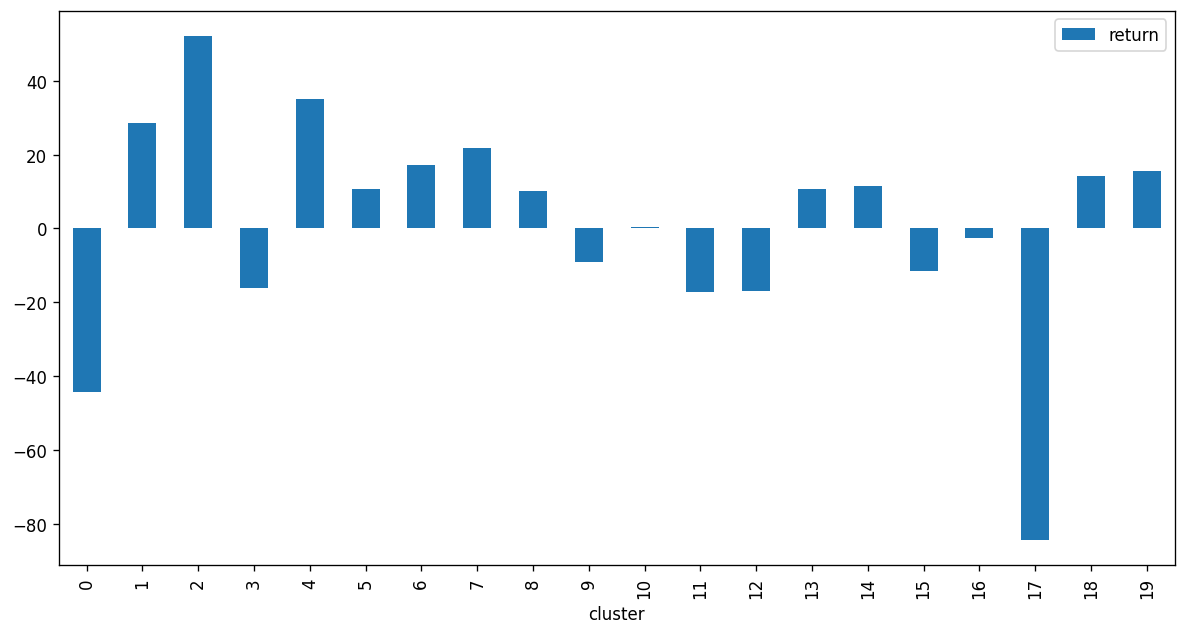

In [31]:
group_by_cluster = useful_data.groupby(['cluster'])[['return']].sum()
group_by_cluster.plot.bar()

<Axes: xlabel='cluster'>

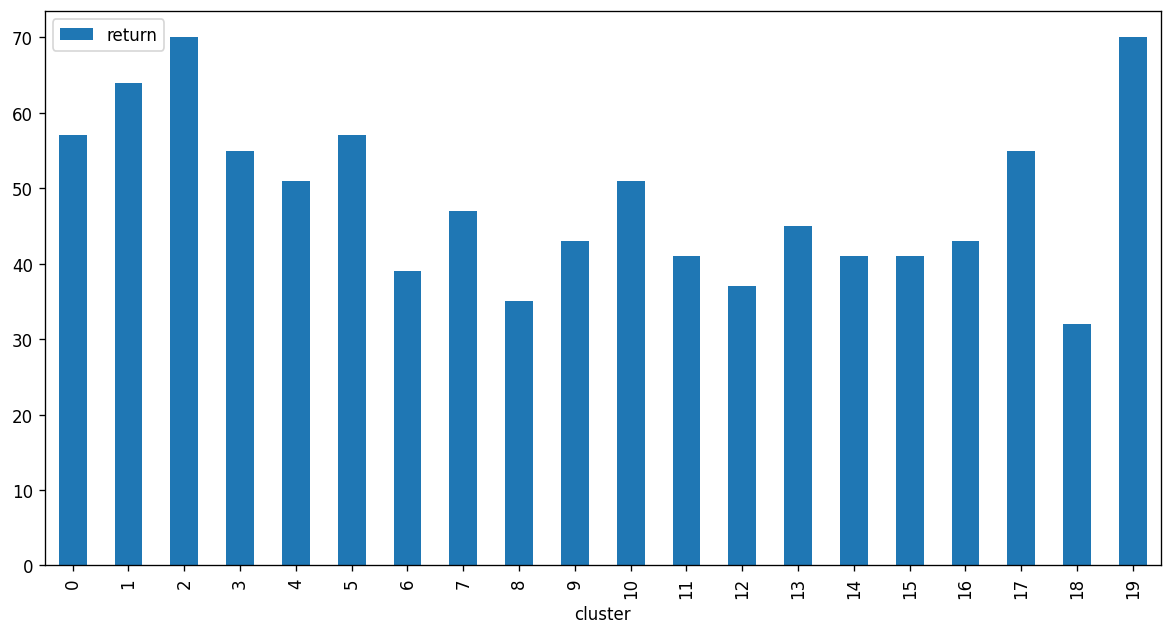

In [32]:
group_by_clusterc = useful_data.groupby(['cluster'])[['return']].count()
group_by_clusterc.plot.bar()

## 1. Price from 2:00PM & ATC relationship

In [10]:
df1 = data.copy()
df1['return'] = df1['return'].shift(-2)
df1['Close_s1'] = df1['Close'].shift(1)
df1['Close_s2'] = df1['Close'].shift(2)
df1['Close_s3'] = df1['Close'].shift(3)
df1['Close_s4'] = df1['Close'].shift(4)
df1['Close_s5'] = df1['Close'].shift(5)
useful_data = df1[(df1.index.hour == 14) & (df1.index.minute == 25)]

In [17]:
feature_cols = ["Close", "Close_s1", "Close_s2", "Close_s3", "Close_s4", "Close_s5"]
cluster = KMeans(n_clusters=20, n_init=2).fit(useful_data[feature_cols])
useful_data = useful_data.assign(cluster=cluster.labels_)

In [18]:
useful_data

,Open,High,Low,Close,Volume,return,Close_s1,Close_s2,Close_s3,Close_s4,Close_s5,cluster
Date,,,,,,,,,,,,
2020-11-02 14:25:00,904.9,907.0,904.5,907.0,5873,-3.0,904.5,899.0,897.7,897.9,901.5,13
2020-11-03 14:25:00,909.0,909.2,908.1,908.5,2677,-0.7,909.0,909.7,906.7,906.0,906.3,13
2020-11-04 14:25:00,912.5,913.9,912.5,913.5,5069,-1.5,912.6,915.0,917.3,917.1,916.7,13
2020-11-05 14:25:00,914.1,914.4,910.0,910.8,7650,0.2,914.4,914.2,915.4,913.9,916.6,13
2020-11-06 14:25:00,910.5,911.0,908.5,910.0,3602,-2.4,910.9,910.6,911.0,907.6,908.6,13
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24 14:25:00,1334.2,1335.1,1333.7,1335.1,6452,0.0,1334.2,1331.8,1329.5,1328.3,1328.1,6
2024-09-25 14:25:00,1344.4,1346.4,1343.6,1344.4,7035,-0.3,1344.7,1343.9,1342.7,1344.5,1343.7,12
2024-09-26 14:25:00,1357.7,1360.4,1357.5,1358.6,8572,-2.4,1357.8,1360.1,1363.1,1365.0,1364.9,12


<Axes: xlabel='cluster'>

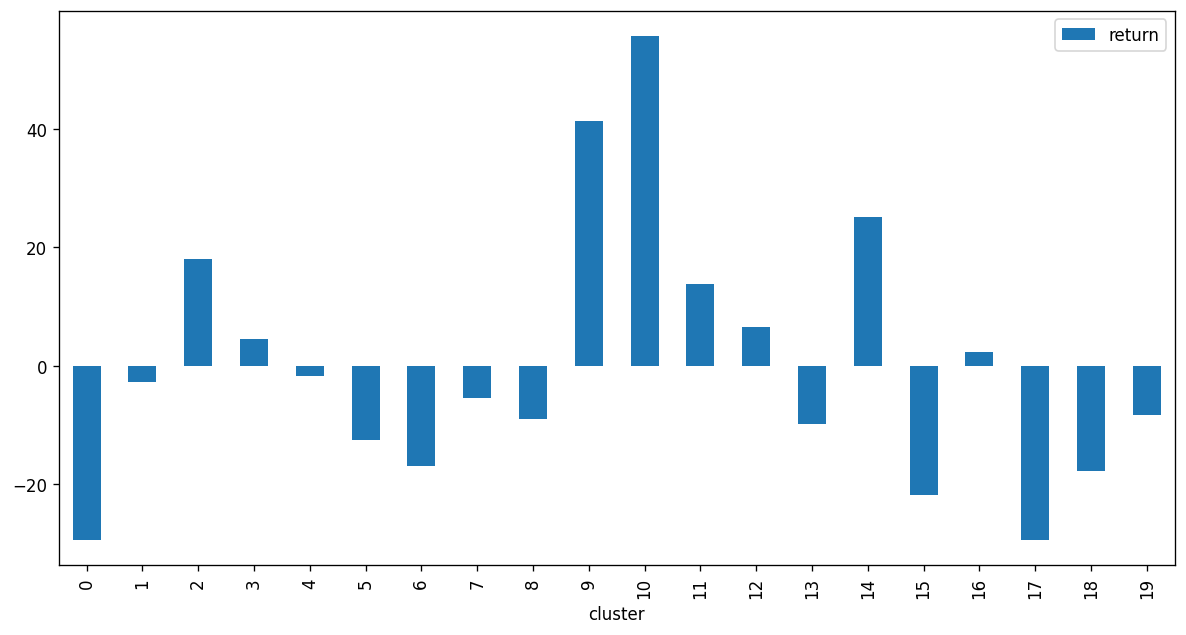

In [19]:
group_by_cluster = useful_data.groupby(['cluster'])[['return']].sum()
group_by_cluster.plot.bar()

<Axes: xlabel='cluster'>

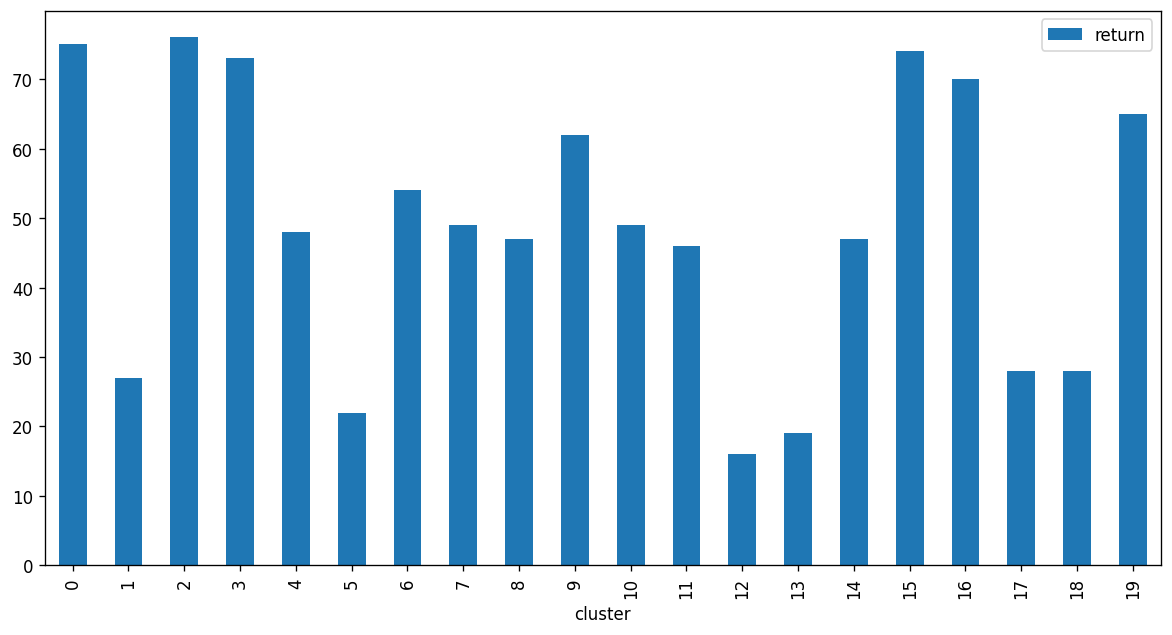

In [20]:
group_by_clusterc = useful_data.groupby(['cluster'])[['return']].count()
group_by_clusterc.plot.bar()